In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords#python -m nltk.downloader stopwords
import string
np.set_printoptions(threshold=np.inf)

In [2]:
df=pd.read_json('../../data/00-raw-data/2022-09-2022-H00-M40-S38-twitter-search.json')
df=df.reset_index()
text=df[df['index']=='text']
text=pd.DataFrame(text)
text.drop(columns=['search_info','index'],inplace=True)

In [3]:
col=(text.shape[1]-1)
data=pd.DataFrame()
for row in text.iterrows():
    data=row[1]
data=pd.DataFrame(data)
data.columns=['text']
data
data.to_csv('../../anly-501-project-T1an-T1an/data/01-modified-data/twitter_text_data.csv')

In [4]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['text']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(data)
tokens


['@txcompleted',
 'i',
 'think',
 'id',
 'be',
 'lying',
 'it',
 'i',
 'put',
 'anything',
 ',',
 'cause',
 'even',
 'something',
 'im',
 'attached',
 'to',
 ',',
 'id',
 'probably',
 'sell',
 'for',
 'the',
 'right',
 'price.rt',
 '@nanda__oce',
 ':',
 '🎁',
 '@satoshinftclub',
 'whitelist',
 '&',
 'eth',
 'giveaway',
 '🎁',
 '🏆',
 '20x',
 'whitelist',
 'spots',
 '@satoshinftclub',
 '🏆',
 '🏆',
 '2x',
 '$',
 '25usd',
 'in',
 'eth',
 'ga',
 '🏆',
 '1️⃣',
 'follow',
 '@satosh',
 '…',
 'wl',
 'notice',
 'minting',
 '@eleven_eth',
 '@cryptobrighton',
 '@2609avnish',
 '@tymoneydt',
 '@ln2661223',
 '@cerealkills_nft',
 '@abdullahshn58',
 '…',
 'https://t.co/slrcwqrmj4rt',
 '@matcote3',
 ':',
 '@moonlitmonkey69',
 '@thormaximalist',
 '@thorchain',
 'you',
 'own',
 '100',
 'eth',
 '@',
 '2000',
 '$',
 ':',
 '200',
 '000',
 '$',
 'you',
 'borrow',
 '100k',
 'and',
 'buy',
 '50',
 'more',
 'eth',
 'eth',
 'value',
 '…',
 'rt',
 '@blockbet_',
 ':',
 'did',
 'you',
 'know',
 ':',
 'on',
 'average',
 

In [21]:

import random
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
tokens_cl

['think',
 'lying',
 'put',
 'anything',
 'cause',
 'even',
 'something',
 'attached',
 'probably',
 'sell',
 'right',
 'price.rt',
 'whitelist',
 'eth',
 'giveaway',
 'whitelist',
 'spots',
 'eth',
 'follow',
 'notice',
 'minting',
 'eth',
 'borrow',
 'buy',
 'eth',
 'eth',
 'value',
 'know',
 'average',
 'btc',
 'million',
 'mined',
 'daily',
 'feel',
 'like',
 'gonna',
 'open',
 'edition',
 'hours',
 'eth',
 'hour',
 'sort',
 'days',
 'since',
 'merge',
 'speculations',
 "what's",
 'next',
 'think',
 'btc',
 'looking',
 'like',
 'take',
 'gigachad',
 'dump',
 'designated',
 'closed',
 'shorts',
 'eth',
 'want',
 'new',
 'nft',
 'want',
 'make',
 'quick',
 'bucks',
 'use',
 'referral',
 'link',
 'pay',
 'someone',
 'rent',
 'likes',
 'retweets',
 'tweet',
 'within',
 'next',
 'hours',
 'paid',
 'eth',
 'winner',
 'must',
 'sol',
 'maxi',
 'guy',
 'eth',
 'account',
 'welcome',
 'fiend',
 'closed',
 'shorts',
 'btc',
 'nice',
 'purchases',
 "let's",
 'get',
 'rid',
 'animals',
 'make'

In [9]:
vectorizer=CountVectorizer() 

In [43]:
word_occ = pd.value_counts(np.array(tokens_cl))


word_occ = pd.DataFrame(word_occ)
word_occ=word_occ.reset_index()
word_occ.columns=['key_words', 'number']
word_occ


,key_words,number
0,eth,299
1,follow,151
2,enter,96
3,get,89
4,giveaway,88
...,...,...
2076,country's,1
2077,convert,1
2078,craziness,1
2079,says,1


In [25]:
tokens_cl_sub = random.sample(tokens_cl, 20)
Xs  =  vectorizer.fit_transform(tokens_cl_sub)   
col_names =vectorizer.get_feature_names_out()

In [26]:
X=np.array(Xs.todense())
X.shape


(20, 21)

In [32]:
maxs=np.max(X,axis=0)
ONE_HOT_ENCODED=np.ceil(X/maxs)
ONE_HOT_ENCODED


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.,

In [28]:
noise=np.random.uniform(0,0.00001,X.shape) 
df1=pd.DataFrame(noise+X, columns=col_names)
corr=df1.corr()


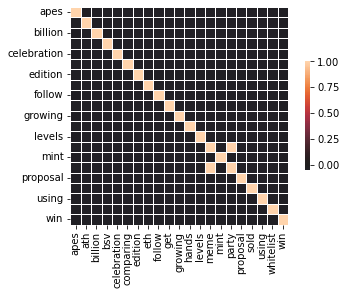

In [38]:
heatmap = sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#heatmap.to_png('/Users/jingdayang/anly-501-project-T1an-T1an/501-project-website/images/heatmap.png')
heatmap.figure.savefig("/Users/jingdayang/anly-501-project-T1an-T1an/501-project-website/images/heatmap.jpg")
#plt.savefig('output.png')

In [33]:
corr

,apes,ath,billion,bsv,celebration,comparing,edition,eth,follow,get,...,hands,levels,meme,mint,party,proposal,sold,using,whitelist,win
apes,1.000000,-0.052636,-0.052632,-0.052624,-0.052632,-0.052631,-0.052629,-0.052637,-0.052631,-0.052629,...,-0.052635,-0.052627,-0.052628,-0.052634,-0.052632,-0.052635,-0.052629,-0.052636,-0.052635,-0.052640
ath,-0.052636,1.000000,-0.052630,-0.052637,-0.052643,-0.052629,-0.052627,-0.052630,-0.052630,-0.052635,...,-0.052633,-0.052636,-0.052636,-0.052633,-0.052632,-0.052625,-0.052630,-0.052632,-0.052623,-0.052627
billion,-0.052632,-0.052630,1.000000,-0.052633,-0.052635,-0.052628,-0.052631,-0.052633,-0.052637,-0.052635,...,-0.052624,-0.052634,-0.052625,-0.052632,-0.052630,-0.052632,-0.052634,-0.052635,-0.052635,-0.052632
bsv,-0.052624,-0.052637,-0.052633,1.000000,-0.052629,-0.052634,-0.052621,-0.052630,-0.052629,-0.052636,...,-0.052635,-0.052631,-0.052627,-0.052638,-0.052623,-0.052632,-0.052630,-0.052625,-0.052631,-0.052629
celebration,-0.052632,-0.052643,-0.052635,-0.052629,1.000000,-0.052625,-0.052633,-0.052635,-0.052639,-0.052630,...,-0.052631,-0.052626,-0.052629,-0.052624,-0.052625,-0.052634,-0.052635,-0.052630,-0.052632,-0.052628
comparing,-0.052631,-0.052629,-0.052628,-0.052634,-0.052625,1.000000,-0.052630,-0.052633,-0.052632,-0.052628,...,-0.052635,-0.052636,-0.052637,-0.052628,-0.052636,-0.052636,-0.052628,-0.052638,-0.052637,-0.052636
edition,-0.052629,-0.052627,-0.052631,-0.052621,-0.052633,-0.052630,1.000000,-0.052626,-0.052633,-0.052641,...,-0.052636,-0.052632,-0.052626,-0.052636,-0.052629,-0.052631,-0.052622,-0.052633,-0.052632,-0.052626
eth,-0.052637,-0.052630,-0.052633,-0.052630,-0.052635,-0.052633,-0.052626,1.000000,-0.052633,-0.052634,...,-0.052630,-0.052627,-0.052630,-0.052627,-0.052631,-0.052631,-0.052633,-0.052632,-0.052634,-0.052633
follow,-0.052631,-0.052630,-0.052637,-0.052629,-0.052639,-0.052632,-0.052633,-0.052633,1.000000,-0.052634,...,-0.052631,-0.052633,-0.052627,-0.052631,-0.052626,-0.052637,-0.052632,-0.052635,-0.052635,-0.052625
get,-0.052629,-0.052635,-0.052635,-0.052636,-0.052630,-0.052628,-0.052641,-0.052634,-0.052634,1.000000,...,-0.052633,-0.052628,-0.052632,-0.052628,-0.052635,-0.052629,-0.052632,-0.052636,-0.052626,-0.052628
